# Distributed Evolutionary Morphing

In this notebook I will show how to do *distributed evolutionary morphing* using 2 orthogonal bases on coupling coefficients for VBF data.

To choose the two bases used in the morphing an evolutionary algorithm implemented with *deap* is used. The algorithms works as follow:

 1. Start with a population of 50 pairs of bases choosed randomly between 64x64 points in the range (-0.5, 0.5). The bases are represented as a vector of 1 and 0 of size 64x2 where the positions of 1 represent the samples used in each base. 
 2. In each iteration the evolutionary algorithm follows the next steps:
   1. With *cxpb* probability apply a cross-over opertor which combine two pairs of bases by taking a randomly choosed slice from on of the pairs and swap it with a slice in the other pair. After that the pairs must be fixed in order to keep only 15 samples choosed for each base.
   2. With *mutpb* probability apply a mutation opertor which mutate a pair of bases by swaping a randomly choosed 1 and 0 between both samples in the pair and also swap a unused sample in the pair for a used sample.
   3. Choose the best samples in the population and keep it for the next iteration using random tournament. The samples are evaluating using a fitness defined as $\sum_{(c1,c2)\in C1XC2} (n\_eff\_1(c1,c2) + n\_eff\_2(c1,c2))$ where $n\_eff\_i(c1,c2)$ are the values of the **n_eff** ratio for the base i and evaluated in the point c1,c2 of the parameter space. Also, if any of the points evaluated in the previous sum have a **condition number** too small then a value of 0 is returned.. 
   4. Save the best pair in the population.
   5. Continue until *ngen* iteration are done.
 3. Finally the best pair of bases is used in the morphing as a weighted sum.
 
It should be noted that *deap* allows to distributed evolutionary algorithms (not shown in this notebook) something that speed up the run a lot.

I will show how to use the class implemented to do the **evolutionary morphing**, this code makes use of the EFT Morphing code. A python Wrapper for this code have been implemented.


In [1]:

import numpy as np
import pdb 
from pyMorphWrapper import MorphingWrapper

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

We start by defining some constants:
- The fitting range
- The number of points in the coupling space to be used in the fit
- The available samples

In [19]:
# Define fitting ranges
g1_range = (-0.3557,0.2646)
g2_range = (-0.34467,0.34467)

# Points where to evaluate the n_eff of the bases
npoints = 15

nsamples = 15
ncomb = 18
csarray1 = np.linspace(g1_range[0],g1_range[1],npoints)
csarray2 = np.linspace(g2_range[0], g2_range[1], npoints)

# List of availables basis samples
#available_samples = [[1.0, 1.0, 0.5], [1.0, 0.0, -1.0], [1.0, 0.0, -0.5], [1.0, 1.0, 0.0], [1.0, 1.0, 1.0], 
#                     [1.0, 1.0, -0.5], [1.0, 0.5, 0.3333333333333333], [1.0, 0.3333333333333333, 0.2], 
#                     [1.0, 0.3333333333333333, 0.14285714285714285], [1.0, 0.25, 0.16666666666666666], 
#                     [1.0, 2.0, 0.0], [1.0, 2.0, 1.0], [1.0, 2.0, 2.0], [1.0, 2.0, -1.0], [1.0, -1.0, 0.0],
#                     [1.0, -1.0, 0.5], [1.0, -1.0, -0.5], [1.0, -0.5, -0.3333333333333333], 
#                     [1.0, -0.3333333333333333, -0.2], [1.0, -0.3333333333333333, -0.14285714285714285], 
#                     [1.0, -0.25, -0.16666666666666666], [1.0, -2.0, 0.0], [1.0, -2.0, 1.0], [1.0, -2.0, -1.0], 
#                     [1.0, -2.0, -2.0], [1.0, -1.5, -1.5]]
#print available_samples
# Samples used in the evolutionary algorithm
available_samples = [[1.0,cs1,cs2] for cs1 in np.linspace(-0.5,0.5,8) for cs2 in np.linspace(-0.5,0.5,8)]


Now we use the morphing class and set the data used in the morphing.

In [4]:
from pyMorphWrapper import MorphingWrapper
# Compute both bases
np.random.seed(1234)
morph = MorphingWrapper()
# Define number of samples, number of couplings, types (S,P,D) and available samples
# Using half of range as initial target (used only to make computation faster)
target = [1.,1.,1.]
morph.setSampleData(nsamples=nsamples,ncouplings=3,types=['S','S','S'],samples=available_samples,
      ncomb=ncomb)

indexes = morph.evolMorphing(cvalues_1 = csarray1,cvalues_2 = csarray2)

# Obtain the bases by using smooth dynamic morphing

gen	nevals	avg     	max     
0  	50    	0.228716	0.453749
1  	38    	0.28722 	0.503285
2  	47    	0.321366	0.58939 
3  	40    	0.331062	0.58939 
4  	44    	0.348332	0.58939 
5  	37    	0.356573	0.58939 
6  	44    	0.3741  	0.58939 
7  	41    	0.371402	0.58939 
8  	40    	0.350591	0.563731
9  	39    	0.370961	0.523243
10 	39    	0.378703	0.567523
11 	37    	0.389789	0.567523
12 	37    	0.400978	0.567523
13 	37    	0.385801	0.567523
14 	38    	0.419029	0.611576
15 	38    	0.439878	0.685371
16 	38    	0.455454	0.685371
17 	33    	0.451101	0.662139
18 	33    	0.450839	0.662139
19 	31    	0.44909 	0.662139
20 	38    	0.452309	0.614568
21 	42    	0.476085	0.634069
22 	40    	0.446623	0.634069
23 	31    	0.476426	0.6475  
24 	40    	0.430813	0.598633
25 	45    	0.443169	0.598633
26 	37    	0.427202	0.61481 
27 	32    	0.461915	0.598633
28 	44    	0.45417 	0.601869
29 	39    	0.463604	0.630998
30 	38    	0.465297	0.598633
31 	38    	0.488964	0.622021
32 	37    	0.453076	0.622021
33 	39    	0.4

In [23]:
# Obtain the bases by using smooth dynamic morphing
#indexes = morph.dynamicMorphing(cvalues_1 = csarray1,cvalues_2 = csarray2)

In [24]:
print indexes
# Best pair found using 11x11 samples and 2500 iterations in the evolutionary algorithm
#indexes = [[4, 12, 17, 26, 31, 36, 51, 56, 60, 69, 75, 84, 104, 110, 120], [10, 11, 13, 16, 30, 37, 43, 46, 50, 59, 74, 82, 88, 91, 108]]
#0.89, 11
#indexes = [[0, 7, 11, 13, 18, 20, 22, 25, 27, 29, 42, 44, 55, 59, 61], [1, 3, 6, 19, 21, 23, 24, 26, 28, 35, 38, 41, 45, 58, 63]]
# 0.88, 8

[array([ 1,  4,  9, 14, 19, 20, 27, 29, 31, 34, 40, 44, 47, 49, 61]), array([ 3,  6,  8, 12, 18, 21, 23, 24, 28, 35, 38, 41, 45, 50, 55])]


Next we obtain the cross sections and weights for each one of the orthogonal bases and for each point on the parameter space.

In [25]:
# Save cross sections and couplings for each one of the points on the fitting space
# Also compute the weighted n_eff
for l,ind in enumerate(indexes): 
  ind = np.array(ind)
  morph.resetBasis([available_samples[int(k)] for k in ind]) 
  sorted_indexes = np.argsort(ind)
  indexes[l] = ind[sorted_indexes]
  for i,cs in enumerate(csarray1):
    for j,cs2 in enumerate(csarray2):
      target[1] = cs
      target[2] = cs2 
      morph.resetTarget(target)
        # Compute weights and cross section of each sample
      couplings = np.array(morph.getWeights())
      cross_section = np.array(morph.getCrossSections())
      couplings,cross_section = (couplings[sorted_indexes],
                        cross_section[sorted_indexes])
      # Save list of cross sections and weights for each samples and orthogonal bases
      all_couplings = np.vstack([all_couplings,couplings])  if i <> 0 or j <> 0 or l <> 0 else couplings
      all_cross_sections = np.vstack([all_cross_sections, cross_section]) if i <> 0 or j <> 0 or l <> 0 else cross_section

Finally, we compute the weighted n_eff for each point in the parameter space

In [26]:
# Now compute and plot the weighted n_eff in order to evaluate the models
alpha = np.zeros([csarray1.shape[0],csarray2.shape[0],2])
n_eff_ratio = np.zeros((csarray1.shape[0], csarray2.shape[0]))
for i,cs in enumerate(csarray1):
  for j, cs2 in enumerate(csarray2):
    target[1] = cs
    target[2] = cs2
    #print '{0} {1}'.format(i,j)
    #print target

    c1s_1 = all_couplings[i*npoints + j]
    cross_section_1 = all_cross_sections[i*npoints + j]
    c1s_1 = np.multiply(c1s_1,cross_section_1)
    n_eff = c1s_1.sum()
    n_tot = np.abs(c1s_1).sum()
    n_eff_1 = n_eff / n_tot

    c1s_2 = all_couplings[npoints*npoints + i*npoints + j]
    cross_section_2 = all_cross_sections[npoints*npoints + i*npoints + j]
    c1s_2 = np.multiply(c1s_2,cross_section_2)
    n_eff = c1s_2.sum()
    n_tot = np.abs(c1s_2).sum()
    n_eff_2 = n_eff / n_tot

    # Compute weights for bases
    neff2 = 1./n_eff_2
    neff1 = 1./n_eff_1
    alpha1 = np.exp(-np.sqrt(neff1))
    alpha2 = np.exp(-np.sqrt(neff2))
    alpha[i,j,0] = alpha1/(alpha1 + alpha2)
    alpha[i,j,1] = alpha2/(alpha1 + alpha2)

    # Compute Bkg weights
    n_eff_ratio[i,j] = (alpha[i,j,0]*n_eff_1 + alpha[i,j,1]*n_eff_2)

    print 'Weighted eff for ({0},{1}): {2}'.format(cs,cs2,n_eff_ratio[i,j])

Weighted eff for (-0.3557,-0.34467): 0.525584582262
Weighted eff for (-0.3557,-0.295431428571): 0.287288221824
Weighted eff for (-0.3557,-0.246192857143): 0.246998768696
Weighted eff for (-0.3557,-0.196954285714): 0.226359134512
Weighted eff for (-0.3557,-0.147715714286): 0.220177281715
Weighted eff for (-0.3557,-0.0984771428571): 0.23543871897
Weighted eff for (-0.3557,-0.0492385714286): 0.276851917694
Weighted eff for (-0.3557,0.0): 0.3415927228
Weighted eff for (-0.3557,0.0492385714286): 0.534407248725
Weighted eff for (-0.3557,0.0984771428571): 0.561921186106
Weighted eff for (-0.3557,0.147715714286): 0.423818630921
Weighted eff for (-0.3557,0.196954285714): 0.385022698842
Weighted eff for (-0.3557,0.246192857143): 0.388431195612
Weighted eff for (-0.3557,0.295431428571): 0.409397815574
Weighted eff for (-0.3557,0.34467): 0.606135969651
Weighted eff for (-0.311392857143,-0.34467): 0.434002860759
Weighted eff for (-0.311392857143,-0.295431428571): 0.330848661059
Weighted eff for (-0

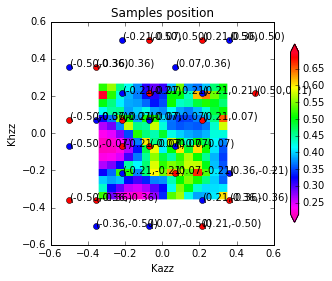

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig,ax = plt.subplots()
    
A = [available_samples[ind][1] for ind in indexes[0]]
B = [available_samples[ind][2] for ind in indexes[0]]
A2 = [available_samples[ind][1] for ind in indexes[1]]
B2 = [available_samples[ind][2] for ind in indexes[1]]

ax.set_title('Samples position')
ax.set_xlabel('Kazz')
ax.set_ylabel('Khzz')    
    
vals = np.flipud(n_eff_ratio)
im = plt.imshow(vals, extent=(csarray2.min(), csarray2.max(), csarray1.min(),csarray1.max()),
                interpolation='nearest', cmap=cm.gist_rainbow_r)
CB = plt.colorbar(im, shrink=0.8, extend='both')

plt.plot(A,B,'ro')
plt.plot(A2,B2,'bo')
for xy in zip(A, B):                                               
    ax.annotate('({0:.2f},{1:.2f})'.format(xy[0],xy[1]), xy=xy, textcoords='offset points') 
for xy in zip(A2, B2):                                               
    ax.annotate('({0:.2f},{1:.2f})'.format(xy[0],xy[1]), xy=xy, textcoords='offset points') 

my_dpi=96
plt.savefig('morph/evmorph_khzz_kazz_8_05_05.png', dpi=my_dpi * 10)